# Measures of central tendency and exploring distributions in a given month

### This is for one month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB
None
                 Lat            Lon
count  564516.000000  564516.000000
mean       40.740005     -73.976817
std         0.036083       0.050426
min        40.072900     -74.773300
25%        40.722500     -73.997700
50%        40.742500     -73.984800
75%        40.760700     -73.970000
max        42.116600     -72.066600
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


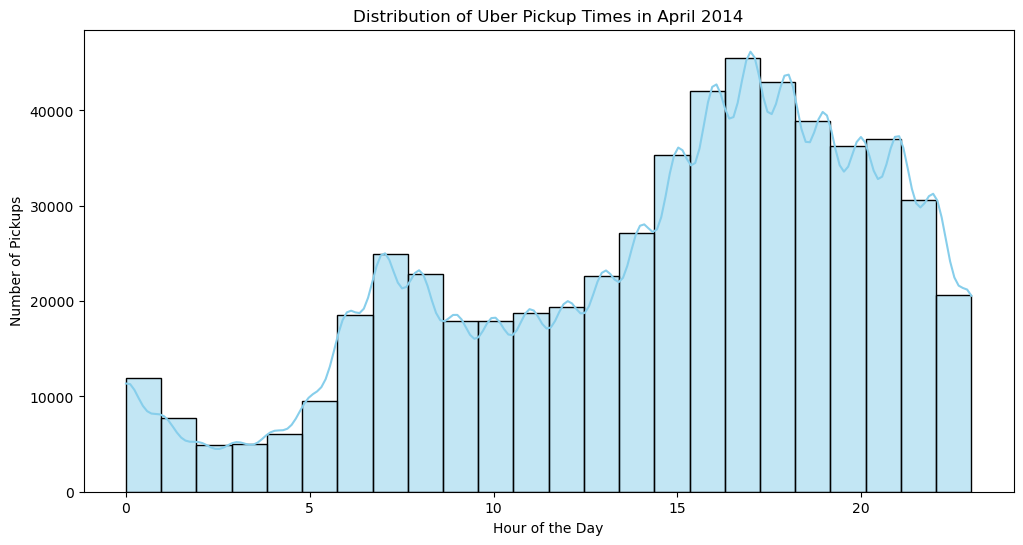

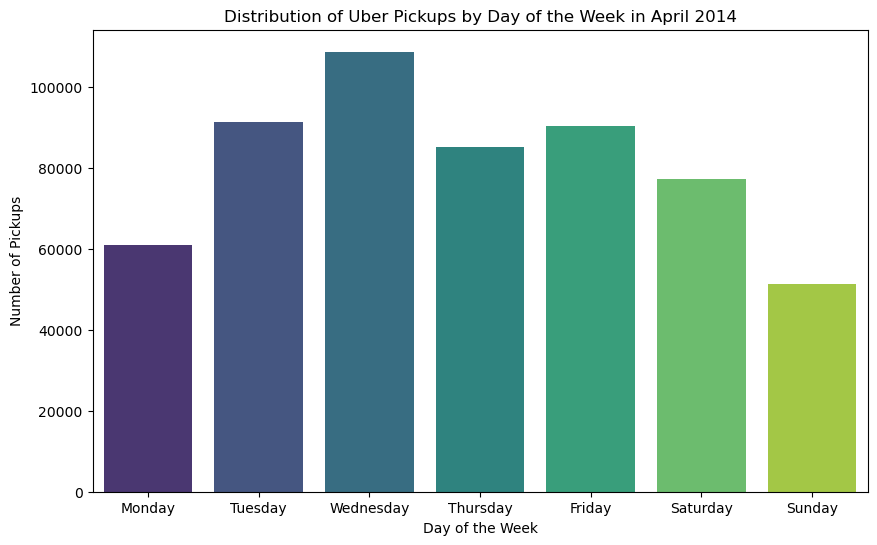

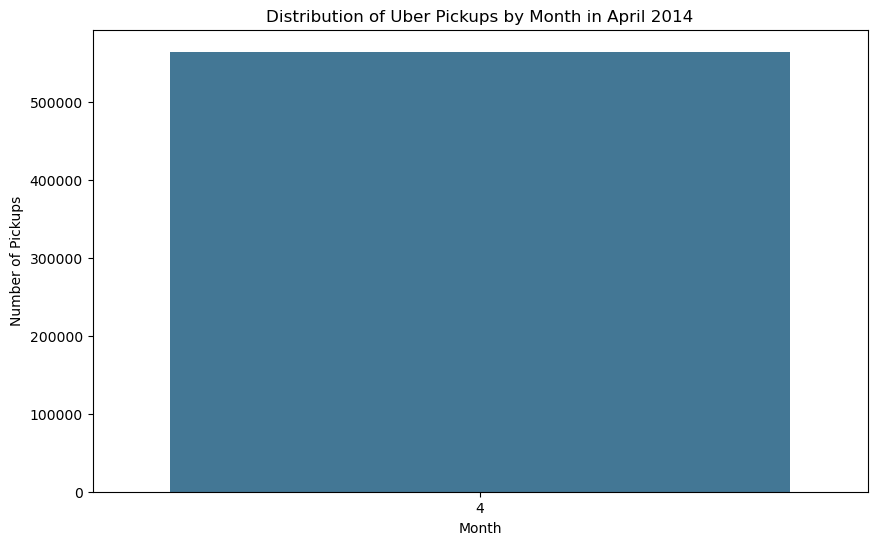

C:\Users\rajar\AppData\Local\Temp\ipykernel_8600\711471102.py:51: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = uber_apr14.corr()


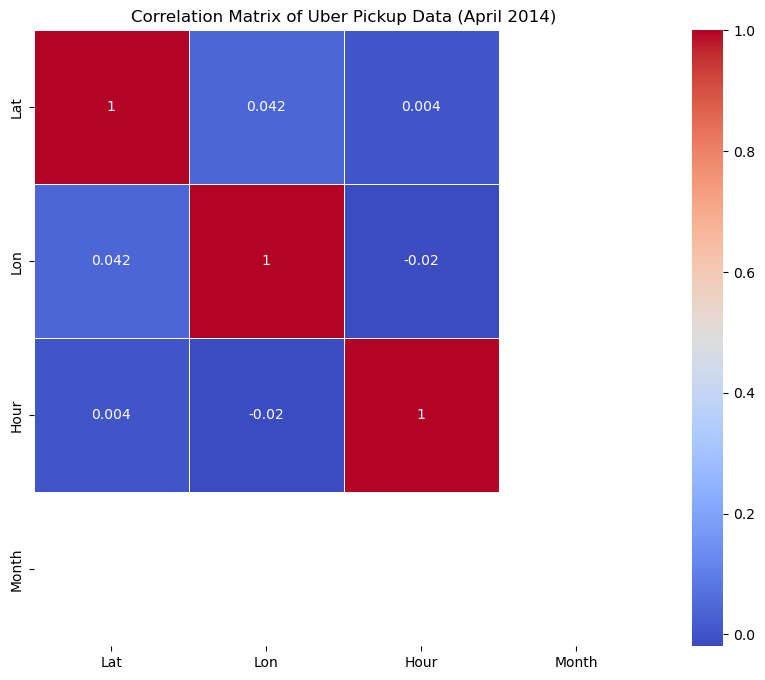

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Uber trip data for April 2014
uber_apr14 = pd.read_csv(r'D:\New folder\uber-raw-data-apr14.csv')

# Display basic information about the dataset
print(uber_apr14.info())

# Display descriptive statistics
print(uber_apr14.describe())

# Check for missing values
print(uber_apr14.isnull().sum())

# Convert 'Date/Time' to datetime format
uber_apr14['Date/Time'] = pd.to_datetime(uber_apr14['Date/Time'])

# Extract additional time-related features
uber_apr14['Hour'] = uber_apr14['Date/Time'].dt.hour
uber_apr14['DayOfWeek'] = uber_apr14['Date/Time'].dt.day_name()
uber_apr14['Month'] = uber_apr14['Date/Time'].dt.month

# Plot a histogram of pickup times
plt.figure(figsize=(12, 6))
sns.histplot(uber_apr14['Hour'], bins=24, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Uber Pickup Times in April 2014')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Analyze the distribution of pickups by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=uber_apr14, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Distribution of Uber Pickups by Day of the Week in April 2014')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

# Analyze the distribution of pickups by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=uber_apr14, palette='mako')
plt.title('Distribution of Uber Pickups by Month in April 2014')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

# Analyze the correlation between variables
correlation_matrix = uber_apr14.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Uber Pickup Data (April 2014)')
plt.show()


# stats for each month

In [2]:
import pandas as pd

# Load the Uber dataset for each month
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
uber_data = {}

for month in months:
    file_path = f'D:/New folder/uber-raw-data-{month}14.csv'
    uber_data[month] = pd.read_csv(file_path)
    # Convert 'Date/Time' to datetime format
    uber_data[month]['Date/Time'] = pd.to_datetime(uber_data[month]['Date/Time'])

# Concatenate the data for all months into a single DataFrame
all_months_data = pd.concat(uber_data.values(), ignore_index=True)

# Extract additional time-related features
all_months_data['Month'] = all_months_data['Date/Time'].dt.month_name()

# Group by month and compute statistics
monthly_statistics = all_months_data.groupby('Month').agg({
    'Date/Time': 'count',  # Count of pickups
    'Lat': ['mean', 'std'],  # Mean and standard deviation of latitude
    'Lon': ['mean', 'std'],  # Mean and standard deviation of longitude
    # Add more statistics as needed...
})

# Rename columns for better readability
monthly_statistics.columns = ['Pickup Count', 'Mean Latitude', 'Std Latitude', 'Mean Longitude', 'Std Longitude']

# Display the statistics
print(monthly_statistics)


           Pickup Count  Mean Latitude  Std Latitude  Mean Longitude  \
Month                                                                  
April            564516      40.740005      0.036083      -73.976817   
August           829275      40.737781      0.043628      -73.970160   
July             796121      40.739141      0.040551      -73.972353   
June             663844      40.739884      0.038387      -73.974073   
May              652435      40.740072      0.037537      -73.975004   
September       1028136      40.739221      0.040829      -73.971817   

           Std Longitude  
Month                     
April           0.050426  
August          0.061483  
July            0.058660  
June            0.056647  
May             0.054165  
September       0.058314  


# barchart for pickups in Apr-Sep

          Month  Pickup Count
count  6.000000  6.000000e+00
mean   6.500000  7.557212e+05
std    1.870829  1.654817e+05
min    4.000000  5.645160e+05
25%    5.250000  6.552872e+05
50%    6.500000  7.299825e+05
75%    7.750000  8.209865e+05
max    9.000000  1.028136e+06


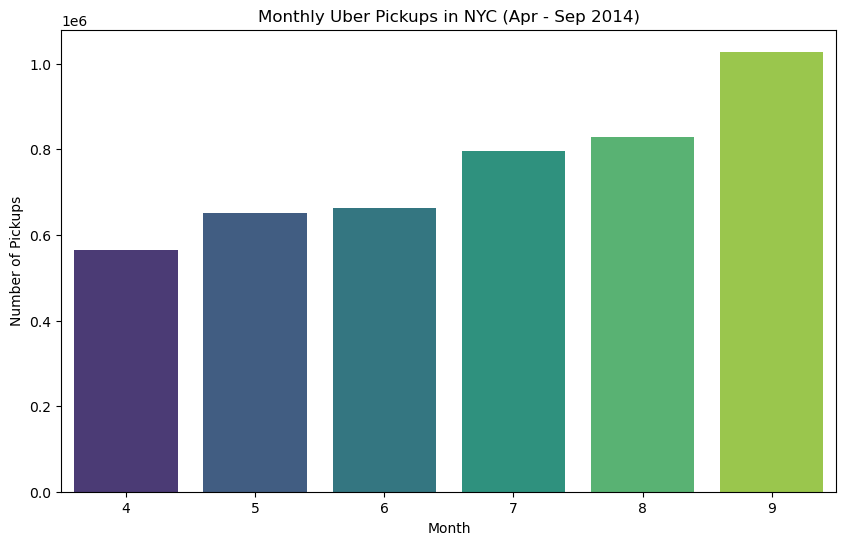

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data for each month into the 'uber_data' dictionary

# Concatenate the data for all months
uber_combined = pd.concat(list(uber_data.values()), ignore_index=True)  # Convert the dictionary values to a list

# Convert 'Date/Time' to datetime format
uber_combined['Date/Time'] = pd.to_datetime(uber_combined['Date/Time'])

# Extract month from the 'Date/Time' column
uber_combined['Month'] = uber_combined['Date/Time'].dt.month

# Group by month and count the number of pickups
monthly_pickups = uber_combined.groupby('Month').size().reset_index(name='Pickup Count')

# Display basic statistics
print(monthly_pickups.describe())

# Visualize the monthly pickups
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Pickup Count', data=monthly_pickups, palette='viridis')
plt.title('Monthly Uber Pickups in NYC (Apr - Sep 2014)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()


# Average weekdays vs weekends

In [4]:
import pandas as pd

# Load the Uber trip data for the specific month (replace 'your_file.csv' with the actual file name)
#data = pd.read_csv(r'D:\New folder\uber-raw-data-apr14.csv')

# Convert 'Date/Time' to datetime object
uber_apr14['Date/Time'] = pd.to_datetime(uber_apr14['Date/Time'])

# Extract day of the week (0 = Monday, 6 = Sunday)
uber_apr14['Day_of_Week'] = uber_apr14['Date/Time'].dt.dayofweek

# Differentiate between weekdays (0-4) and weekends (5-6)
uber_apr14['Weekday'] = uber_apr14['Day_of_Week'] < 5  # True for weekdays, False for weekends

# Group by 'Weekday' and calculate average pickups
average_pickups = uber_apr14.groupby('Weekday')['Date/Time'].count().mean()

# Separate average pickups for weekdays and weekends
average_pickups_weekdays = uber_apr14[uber_apr14['Weekday']]['Date/Time'].count().mean()
average_pickups_weekends = uber_apr14[~uber_apr14['Weekday']]['Date/Time'].count().mean()

print(f"Average Pickups (All Days): {average_pickups}")
print(f"Average Pickups (Weekdays): {average_pickups_weekdays}")
print(f"Average Pickups (Weekends): {average_pickups_weekends}")


Average Pickups (All Days): 282258.0
Average Pickups (Weekdays): 436047.0
Average Pickups (Weekends): 128469.0


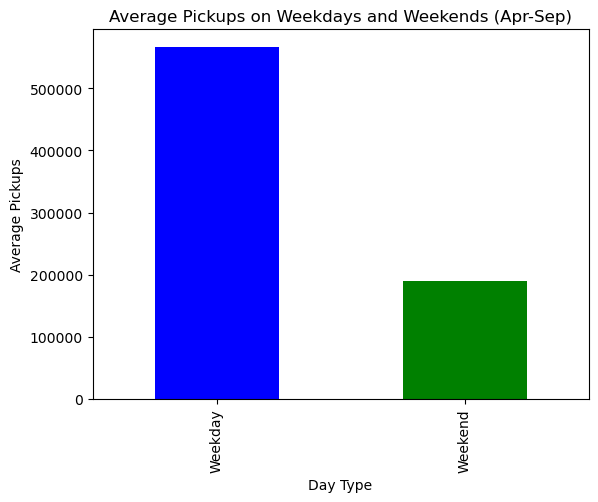

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Uber trip data for April to September 2014
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
file_paths = [f'D:/New folder/uber-raw-data-{month}14.csv' for month in months]

# Combine data from all months
uber_data = pd.concat([pd.read_csv(file_path) for file_path in file_paths])

# Convert 'Date/Time' column to datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Create a new column for day type (weekday or weekend)
uber_data['Day Type'] = uber_data['Date/Time'].dt.day_name()
uber_data['Day Type'] = uber_data['Day Type'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by day type and calculate average pickups
average_pickups = uber_data.groupby('Day Type').size() / len(months)

# Plot the results
average_pickups.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Pickups on Weekdays and Weekends (Apr-Sep)')
plt.xlabel('Day Type')
plt.ylabel('Average Pickups')
plt.show()


# plot picks by months

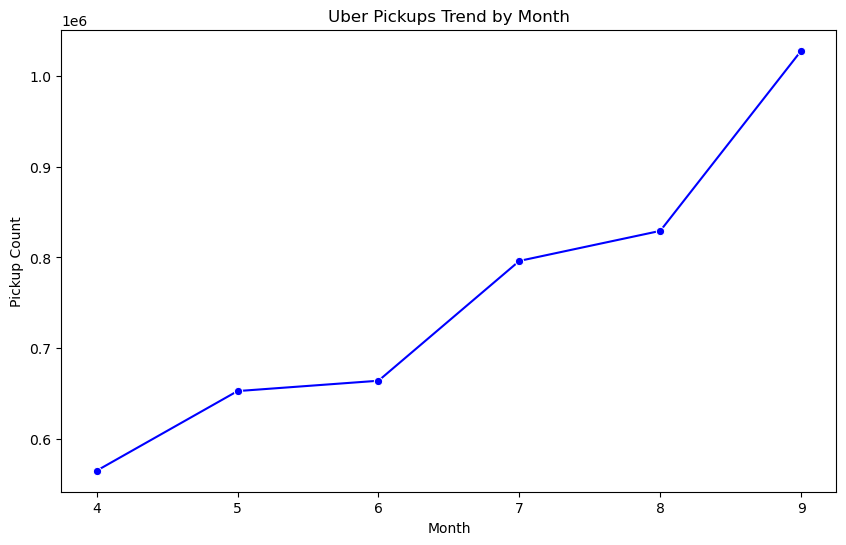

In [6]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot Pickup Count by Month
sns.lineplot(x='Month', y='Pickup Count', data=monthly_pickups, marker='o', color='b')
plt.title('Uber Pickups Trend by Month')
plt.xlabel('Month')
plt.ylabel('Pickup Count')

plt.show()


# heatmap hrs vs by months

C:\Users\rajar\AppData\Local\Temp\ipykernel_8600\3183757478.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_pivot = heatmap_data.pivot('Hour', 'Month', 'Pickup Count')


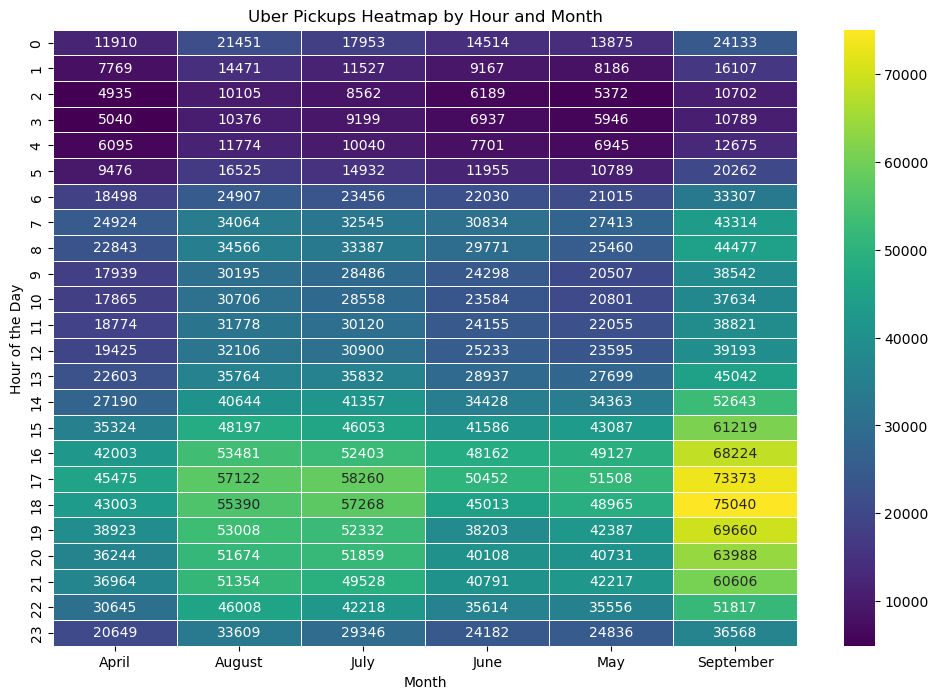

In [7]:
# Extract additional time-related features
all_months_data['Hour'] = all_months_data['Date/Time'].dt.hour

# Create a pivot table for heatmap
heatmap_data = all_months_data.groupby(['Hour', 'Month']).size().reset_index(name='Pickup Count')
heatmap_data_pivot = heatmap_data.pivot('Hour', 'Month', 'Pickup Count')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Uber Pickups Heatmap by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour of the Day')

plt.show()

# heatmap of hrs vs each day of month

C:\Users\rajar\AppData\Local\Temp\ipykernel_8600\1032053825.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_pivot = heatmap_data.pivot('Hour', 'Day', 'Pickup Count')


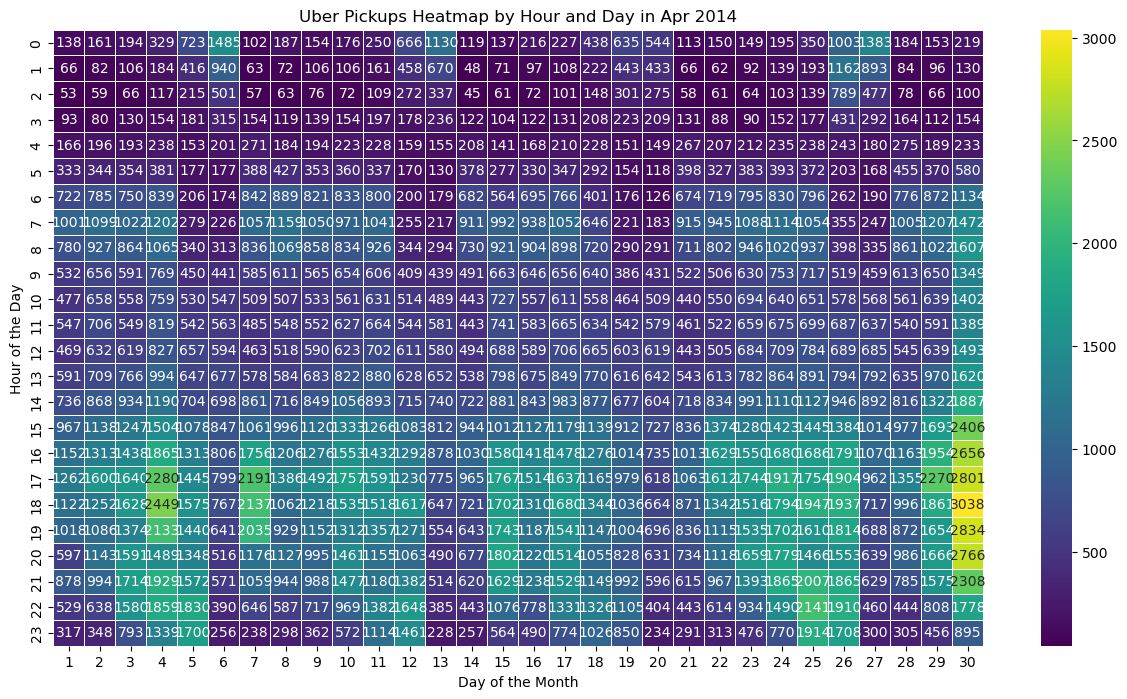

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Uber dataset for a specific month
selected_month = 'apr'  # Change this to the desired month
file_path = f'D:/New folder/uber-raw-data-{selected_month}14.csv'
uber_data = pd.read_csv(file_path)
# Convert 'Date/Time' to datetime format
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Extract additional time-related features
uber_data['Hour'] = uber_data['Date/Time'].dt.hour
uber_data['Day'] = uber_data['Date/Time'].dt.day

# Create a pivot table for heatmap
heatmap_data = uber_data.groupby(['Hour', 'Day']).size().reset_index(name='Pickup Count')
heatmap_data_pivot = heatmap_data.pivot('Hour', 'Day', 'Pickup Count')

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_pivot, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title(f'Uber Pickups Heatmap by Hour and Day in {selected_month.capitalize()} 2014')
plt.xlabel('Day of the Month')
plt.ylabel('Hour of the Day')

plt.show()


# corelational analysis

C:\Users\rajar\AppData\Local\Temp\ipykernel_8600\279742841.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = uber_combined.corr()


Correlation Matrix:
            Lat       Lon     Month
Lat    1.000000  0.032479 -0.013094
Lon    0.032479  1.000000  0.032918
Month -0.013094  0.032918  1.000000


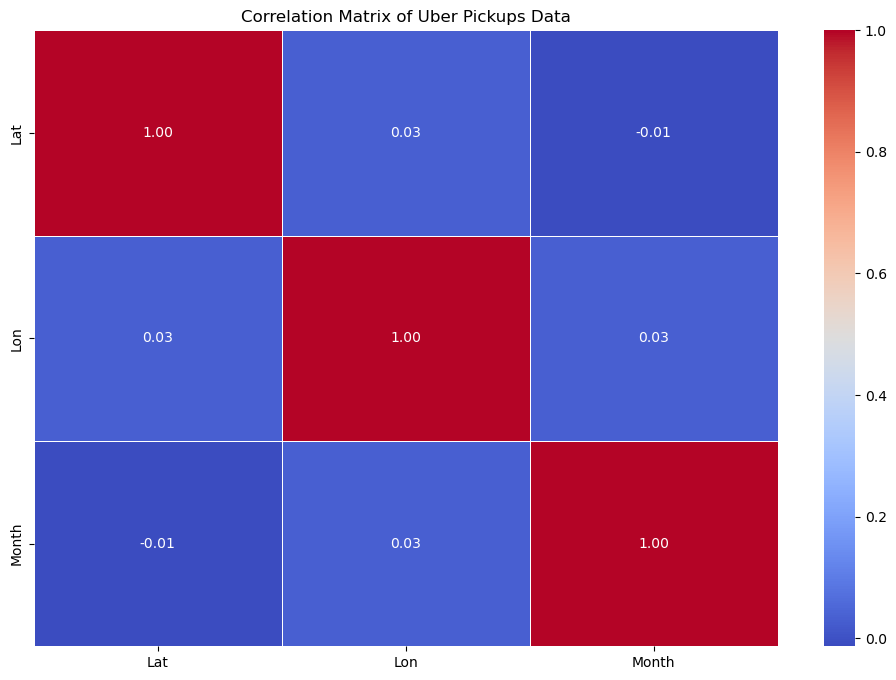

C:\Users\rajar\AppData\Local\Temp\ipykernel_8600\279742841.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = uber_combined.corr()


Correlation Matrix:
            Lat       Lon     Month
Lat    1.000000  0.032479 -0.013094
Lon    0.032479  1.000000  0.032918
Month -0.013094  0.032918  1.000000


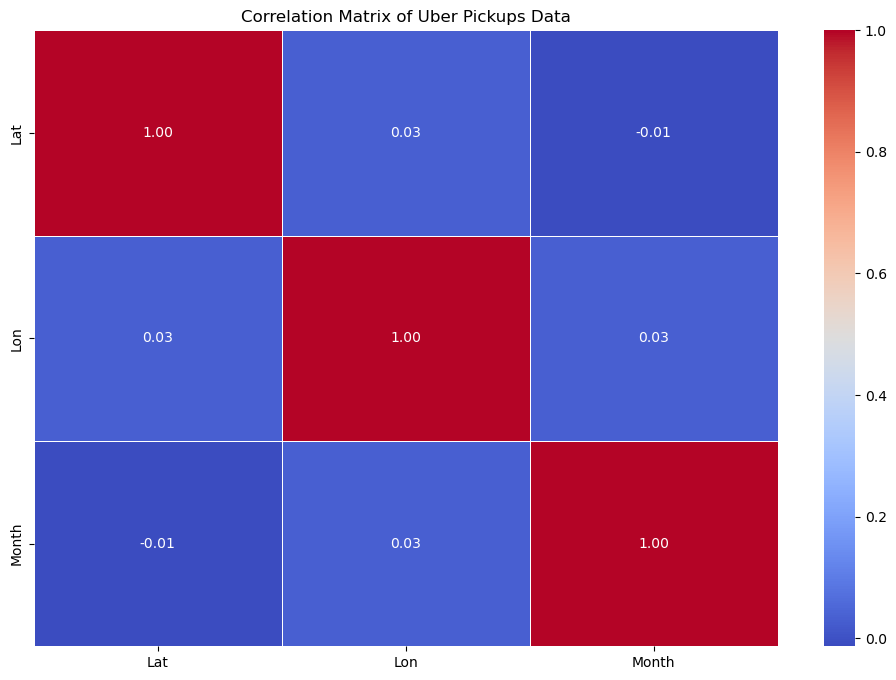

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Display correlation matrix
correlation_matrix = uber_combined.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Uber Pickups Data')
plt.show()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the data for each month into the 'uber_data' dictionary

# Combine the data for all months
#uber_combined = pd.concat(list(uber_data.values()), ignore_index=True)  # Convert the dictionary values to a list

# Convert 'Date/Time' to datetime format
uber_combined['Date/Time'] = pd.to_datetime(uber_combined['Date/Time'])

# Extract month from the 'Date/Time' column
uber_combined['Month'] = uber_combined['Date/Time'].dt.month

# Display correlation matrix
correlation_matrix = uber_combined.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Uber Pickups Data')
plt.show()


# Hyopthesis testing

In [10]:
from scipy.stats import ttest_ind

# Separate data into two groups: first half and second half of the month
first_half = uber_data[uber_data['Day'] <= 15].groupby('Hour').size()
second_half = uber_data[uber_data['Day'] > 15].groupby('Hour').size()

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(first_half, second_half)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average pickups between the first and second halves of the month.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average pickups between the first and second halves of the month.")

T-statistic: -0.6007123366931612
P-value: 0.5509801222752755
Fail to reject the null hypothesis: There is no significant difference in average pickups between the first and second halves of the month.


# Hypothesis Test for Monthly Pickup Counts:

In [11]:
from scipy.stats import f_oneway

# Perform one-way ANOVA test for monthly pickup counts
f_statistic, p_value = f_oneway(
    monthly_pickups[monthly_pickups['Month'] == 4]['Pickup Count'],
    monthly_pickups[monthly_pickups['Month'] == 5]['Pickup Count'],
    monthly_pickups[monthly_pickups['Month'] == 6]['Pickup Count'],
    monthly_pickups[monthly_pickups['Month'] == 7]['Pickup Count'],
    monthly_pickups[monthly_pickups['Month'] == 8]['Pickup Count'],
    monthly_pickups[monthly_pickups['Month'] == 9]['Pickup Count']
)

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average monthly pickup counts.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average monthly pickup counts.")


F-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in average monthly pickup counts.


C:\Users\rajar\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


# Hypothesis Test for Weekend vs. Weekday Pickup Counts:

          Month         Count
count  6.000000  6.000000e+00
mean   6.500000  7.557212e+05
std    1.870829  1.654817e+05
min    4.000000  5.645160e+05
25%    5.250000  6.552872e+05
50%    6.500000  7.299825e+05
75%    7.750000  8.209865e+05
max    9.000000  1.028136e+06
T-statistic: -7.252291354574964
P-value: 2.751104264221837e-05
Reject the null hypothesis: There is a significant difference in average pickup counts between weekends and weekdays.


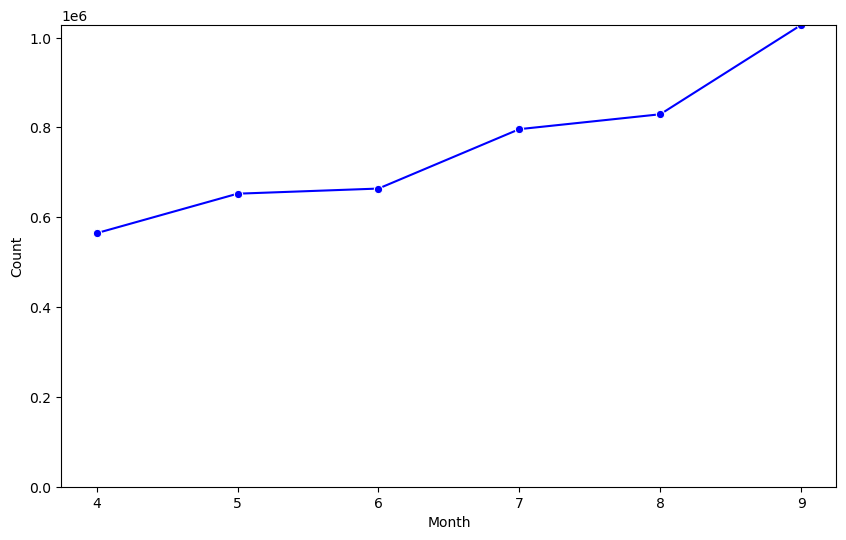

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Assuming you have loaded the data for each month into the 'uber_data' dictionary

# Concatenate the data for all months
#uber_combined = pd.concat(list(uber_data.values()), ignore_index=True)  # Convert the dictionary values to a list

# Convert 'Date/Time' to datetime format
uber_combined['Date/Time'] = pd.to_datetime(uber_combined['Date/Time'])

# Extract month from the 'Date/Time' column
uber_combined['Month'] = uber_combined['Date/Time'].dt.month

# Group by month and count the number of pickups based on the 'Date/Time' column
monthly_pickups = uber_combined.groupby('Month')['Date/Time'].count().reset_index(name='Count')

# Display basic statistics
print(monthly_pickups.describe())

# Visualize the monthly pickups using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Count', data=monthly_pickups, marker='o', color='b')

# Set the y-axis limits or ticks as needed
plt.ylim(0, monthly_pickups['Count'].max() + 500)  # Example: Set a custom y-axis limit

# Create a binary variable for weekends (1) and weekdays (0)
uber_combined['IsWeekend'] = (uber_combined['Date/Time'].dt.dayofweek >= 5).astype(int)

# Perform t-test for weekend vs. weekday pickup counts
weekend_pickups = uber_combined[uber_combined['IsWeekend'] == 1].groupby('Month')['Date/Time'].count()
weekday_pickups = uber_combined[uber_combined['IsWeekend'] == 0].groupby('Month')['Date/Time'].count()

# Perform t-test for weekend vs. weekday pickup counts
t_statistic, p_value = ttest_ind(weekend_pickups, weekday_pickups)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average pickup counts between weekends and weekdays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average pickup counts between weekends and weekdays.")
